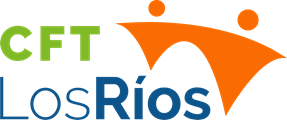

## UNIDAD IV: ESTADISTICA INFERENCIAL
#### PROFESOR: DIEGO MIRANDA
#### DATA SCIENTIST

### Modelo de regresion lineal simple con datos simulados

* y = a + b * x
* x = 100 valores distribuidos segun una N(1.5, 2.5) (media, std)
* Ye = 2 + 2.0 * x + e
* e = estara disribuida segun una N(0 , 0.8)

In [1]:
import pandas as pd
import numpy as np

x = 1.5 + 2.5 * np.random.randn(100)
error = 0 + 0.8 * np.random.randn(100)
y_pred = 2 + 2.0 * x # esto es lo que nos devuelve el modelo lineal
y_actual = 2 + 2.0 * x + error


x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_actual_list = y_actual.tolist()

In [2]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_actual_list,
        "y_prediccion":y_pred_list       
    }
)

data.head()

,x,y_actual,y_prediccion
0,5.805407,13.345990,13.610814
1,3.570371,7.618842,9.140742
2,-1.238675,-0.073450,-0.477351
3,-2.048836,-1.684952,-2.097672
4,2.797875,5.176035,7.595751


In [3]:
y_mean = [np.mean(y_actual)] * len(x_list)

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

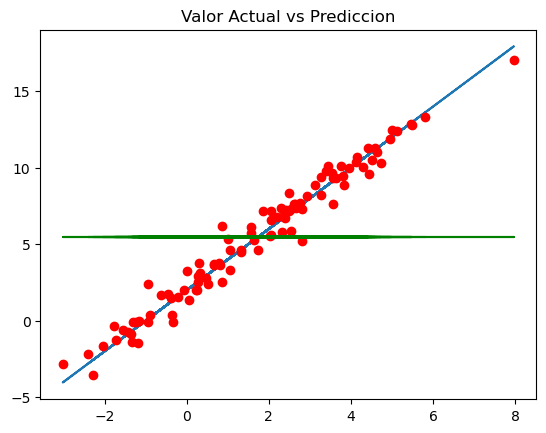

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_actual, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor Actual vs Prediccion")

* SUMA DE LOS CUADRADOS DE LAS DIFERENCIAS (SSD) = DISTANCIA ENTRE LOS VALORES ACTUALES Y LAS PREDICCIONES.
* SUMA DE LOS CUADRADOS TOTALES (SST) = DISTANCIA ENTRE LOS VALORES ACTUALES Y LA MEDIANA O IGUAL SE PUEDE REPRESENTAR CON EL PROMEDIO.
* SUMA DE LOS CUADRADOS DE LA REGRESION (SSR) = DISTANCIA ENTRE LAS PREDICCIONES Y LA MEDIANA O IGUAL SE PUEDE REPRESENTAR CON EL PROMEDIO
* SST = SSR + SSD
* R2 = SSR/SST

In [5]:
y_m = np.mean(y_actual)
data["SSR"] = (data["y_prediccion"]-y_m)**2
data["SSD"] = (data["y_prediccion"]-data["y_actual"])**2
data["SST"] = (data["y_actual"]-y_m)**2

In [6]:
data.head(10)

,x,y_actual,y_prediccion,SSR,SSD,SST
0,5.805407,13.345990,13.610814,66.018713,0.070132,61.785358
1,3.570371,7.618842,9.140742,13.359887,2.316179,4.550619
2,-1.238675,-0.073450,-0.477351,35.557065,0.163136,30.903299
3,-2.048836,-1.684952,-2.097672,57.506373,0.170338,51.417151
4,2.797875,5.176035,7.595751,4.452637,5.855023,0.095845
5,2.381173,6.706654,6.762346,1.630019,0.003102,1.490916
6,2.045278,6.557178,6.090557,0.365944,0.217735,1.148229
7,0.471828,2.762865,2.943656,6.461598,0.032686,7.413417
8,0.652466,3.683672,3.304931,4.755419,0.143445,3.247029
9,-3.027455,-2.832328,-4.054910,91.021785,1.494707,69.188322


In [7]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [8]:
print("La suma de los cuadrados de la regresion es: ", SSR)
print("La suma de los cuadrados de las diferencias es: ", SSD)
print("La suma de los cuadrados totales: ", SST)

La suma de los cuadrados de la regresion es:  1955.1183828592523
La suma de los cuadrados de las diferencias es:  62.03943225185321
La suma de los cuadrados totales:  1893.1629418974233


In [9]:
R2 = SSR/SST
R2

1.0327258893519933

(array([ 2.,  0.,  9., 11., 36., 18., 14.,  8.,  1.,  1.]),
 array([-2.50019886, -2.00820743, -1.516216  , -1.02422457, -0.53223314,
        -0.04024171,  0.45174972,  0.94374115,  1.43573258,  1.92772401,
         2.41971544]),
 <BarContainer object of 10 artists>)

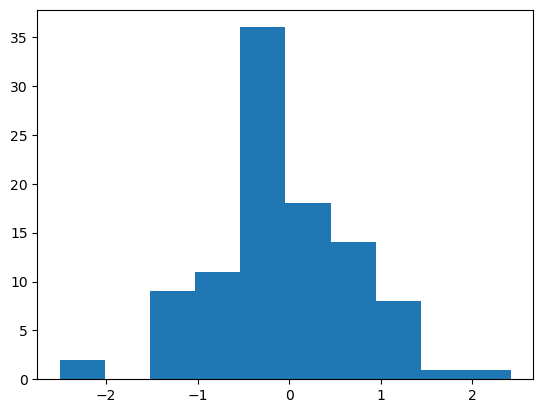

In [10]:
plt.hist(data["y_prediccion"]-data["y_actual"])

In [11]:
x_pred = 3.0  
y_pred = 2 + 2.0 * x_pred  

print("Predicción de y para x =", x_pred, "es", y_pred)

Predicción de y para x = 3.0 es 8.0


In [12]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,5.805407,13.345990,13.610814,66.018713,0.070132,61.785358
1,3.570371,7.618842,9.140742,13.359887,2.316179,4.550619
2,-1.238675,-0.073450,-0.477351,35.557065,0.163136,30.903299
3,-2.048836,-1.684952,-2.097672,57.506373,0.170338,51.417151
4,2.797875,5.176035,7.595751,4.452637,5.855023,0.095845


### Recta de la regresion
* y = a + b * x
* b = sum((xi-x_m)*(y_i-y_m))/sum((xi-x_m)**2)
* a = y_m-b*x_m

In [13]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.6943518528565036, 5.485623746241856)

In [14]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

beta = sum(data["beta_n"])/sum(data["beta_d"])

alpha = y_mean - beta * x_mean

alpha, beta

(2.2027996773250886, 1.9375102422689021)

### El modelo lineal obtenido por regresion es: 
* y = 2.0893476337688237 + 1.9340894476216242 * x

In [15]:
data["y_model"] = alpha + beta * data["x"]

data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,5.805407,13.345990,13.610814,66.018713,0.070132,61.785358,32.314398,16.900773,13.450835
1,3.570371,7.618842,9.140742,13.359887,2.316179,4.550619,4.001958,3.519447,9.120430
2,-1.238675,-0.073450,-0.477351,35.557065,0.163136,30.903299,16.304914,8.602649,-0.197147
3,-2.048836,-1.684952,-2.097672,57.506373,0.170338,51.417151,26.840810,14.011455,-1.766841
4,2.797875,5.176035,7.595751,4.452637,5.855023,0.095845,-0.341638,1.217764,7.623712


In [16]:
SSR = sum((data["y_model"]-y_m)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_m)**2)

SSR, SSD, SST

(1833.9706116089199, 59.19233028850213, 1893.1629418974233)

In [17]:
R2 = SSR/SST
R2

0.9687336314384128

### Validacion del modelo

#### El p-valor

* El modelo presenta una relacion lineal entre x e y: Ye = a + b * x
* H0: b = 0
* H1: b ≠ 0
* Si el p-valor resultante es menor que el nivel de significacion, rechazamos la hipotesis nula y aceptamos que existe una relacion lineal entre x e y